In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy

In [4]:
data = 'amazon_cells_labelled.txt'
amazon = pd.read_csv(data, delimiter='\t', header=None)
#positive column is binary (1 for True, 0 for False)
amazon.columns = ['review', 'positive']

In [45]:
#used some of the reviews here to choose some positive words
amazon.head(5)

,review,positive,good,great,impressed,recommend,excellent,works,good quality,high quality,...,highly,love,worth,fantastic,impressive,glad,really,definitely,no problem,no problems
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#built the keyword list from the dataset and online collections of positive words
#Tried and removed some words that were not present in the reviews
keywords = [
    'good',  
    'great', 
    'impressed', 
    'recommend', 
    'excellent',  
    'works', 
    'good quality', 
    'high quality',
    'satisfied', 
    'best', 
    'like',
    'happy', 
    'highly', 
    'love', 
    'worth', 
    'works', 
    'fantastic',  
    'impressive',
    'glad', 
    'really', 
    'definitely', 
    'no problem', 
    'no problems'
]

for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(
        " " + str(key) + " ", case=False)

In [47]:
#DO NOT RUN THIS CELL MORE THAN ONCE
#all positive data will become False if run again
amazon['positive'] = (amazon['positive'] == 1)

In [30]:
#using this cell to remove keyword features that are not present in the reviews
amazon.drop(['bargain'], axis=1, inplace=True)

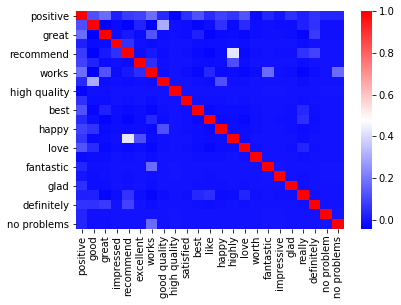

In [31]:
sns.heatmap(amazon.corr(), cmap='bwr')
plt.show()

The words 'highly' and 'recommend' correlate decently together, but for the most part the words are not highly correlated with one another, which is good for the model.

In [32]:
#defining our features and our target result (positive reviewsfor key in keywords:
data = amazon.iloc[:, 2:]
target = amazon['positive']

In [33]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

target_pred = bnb.predict(data)

print('Number of mislabeled points out of a total {} points : {}'.format(
    data.shape[0], (target != target_pred).sum()))

Number of mislabeled points out of a total 1000 points : 348


The feature engineering for this model was pretty straightforward. The goal was to look for positive words in the Amazon reviews and try to predict if the review was positive based on the occurrence of those words. I only allowed features into the model that were present in the reviews.

In the end I could only get the model down to 348 mislabeled points. This isn't very strong from my perspective and could possible be made better if there was some information from the source data on what type of products the reviews were pulled from. Common identifier words would help to make the model better from this point. As I added more features, they were really only taking off one point at a time so I decided to stop adding keywords and call the model done.

Next I will try this set of keywords and method on one of the other datasets to see how effective it can be.

In [34]:
#creating a new dataframe for the Yelp dataset
yelp_data = 'yelp_labelled.txt'
yelp = pd.read_csv(yelp_data, delimiter='\t', header=None)
#positive column is binary (1 for True, 0 for False)
yelp.columns = ['review', 'positive']

In [35]:
yelp.head(5)

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [36]:
for key in keywords:
    yelp[str(key)] = yelp.review.str.contains(
        " " + str(key) + " ", case=False)

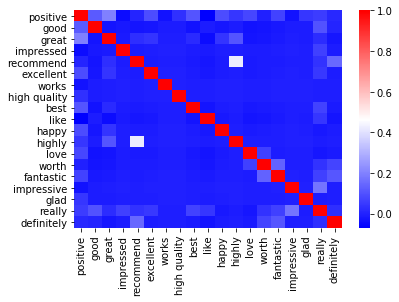

In [47]:
sns.heatmap(yelp.corr(), cmap='bwr')
plt.show()

In [46]:
yelp.drop(['bargain', 'no problem', 'no problems'], axis=1, inplace=True)

In [48]:
#defining our features and our target result (positive reviews)
ylp_data = yelp.iloc[:, 2:]
ylp_target = yelp['positive']

In [49]:
bnb.fit(ylp_data, ylp_target)

ylp_target_pred = bnb.predict(ylp_data)

print('Number of mislabeled points out of a total {} points : {}'.format(
    ylp_data.shape[0], (ylp_target != ylp_target_pred).sum()))

Number of mislabeled points out of a total 1000 points : 387


To be honest, this worked much better than I thought it would, considering the keyword list was generated partially from the Amazon review data. However, it did not include any words that were specific for the type of Amazon reviews so in theory it should still represent positive reviews, regardless of the topic. This could be a good workflow for a first pass model that identifies positive reviews. The keywords list could probably be made better by including a master list of positive words that has likely already been compiled somewhere.